# <u> <center> What is `Machine Learning`? </center> </u>
# Machine learning is set of techniques to make computers better at doing things that humans (traditionally) can do better than machines.
<li> Machine learning involves making machines learn things like humans do. </li>


# <center>Simple Linear regression
### $Y = mx + c$
where <br>
Y => Dependent variable/ target variable <br>
m => Slope or the Gradient or coefficient<br>
c => Y intercept

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
data = {'area':[2600, 3000, 3200, 3600, 4000], 'price':[550000, 565000, 610000, 680000, 725000]}
df = pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price (USD)')

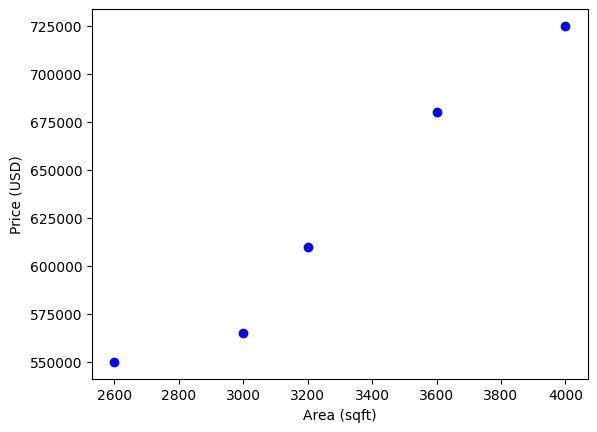

In [13]:
%matplotlib inline
plt.scatter(df.area, df.price, color='blue', marker='o')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (USD)')

In [14]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [22]:
reg.predict([[3300]])

/Users/prajeeshr/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [26]:
coefficient_m = reg.coef_
print(coefficient_m)
intercept_c = reg.intercept_

print(intercept_c)

[135.78767123]
180616.43835616432


In [27]:
coefficient_m * 3300 + intercept_c 

array([628715.75342466])

### References
<li> https://youtube.com/playlist?list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&si=bKUEDxGgPe6AUuTc </li>